In [1]:
#import libraries
import numpy as np # linear algebra
import seaborn as sns
import pandas as pd # data processing
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz
from sklearn.compose import ColumnTransformer #data preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler #data preprocessing
from sklearn.impute import KNNImputer #handle missing values
from sklearn.model_selection import train_test_split #train/test dataset

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score #evaluate model
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_precision_recall_curve


import warnings
# filter warnings
warnings.filterwarnings('ignore')
np.random.seed(0)
%matplotlib inline

In [2]:
name = ['Class','age', 'menopause','tumor-size','inv-nodes', 'node-caps','deg-malig','breast','breast-quad','irradiat']

In [3]:
name = ['Class','age', 'menopause','tumor-size','inv-nodes', 'node-caps','deg-malig','breast','breast-quad','irradiat']
df = pd.read_csv('Data/breast-cancer.data', names = name)

In [4]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [5]:
df.shape

(286, 10)

In [6]:
df['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central', '?'],
      dtype=object)

In [7]:
df = df[df['breast-quad']!='?']
df.shape

(285, 10)

In [8]:
df['node-caps'].unique()

array(['no', 'yes', '?'], dtype=object)

In [9]:
df = df[df['node-caps']!='?']
df.shape

(277, 10)

# Exploratory data analysis


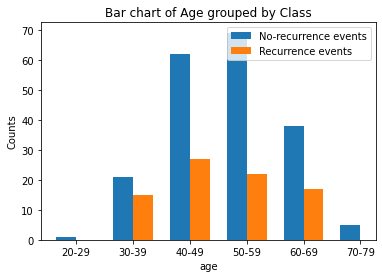

In [10]:
grp = df.groupby(['age', 'Class'])['age'].count().unstack().reset_index()
labels = list(grp.iloc[:, 0].values)
no_dis = list(grp.iloc[:, 1].values) 
yes_dis = list(grp.iloc[:, 2].values)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_dis, width, label='No-recurrence events')
rects2 = ax.bar(x + width/2, yes_dis, width, label='Recurrence events')

ax.set_ylabel('Counts')
ax.set_xlabel('age')
ax.set_title('Bar chart of Age grouped by Class')
ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

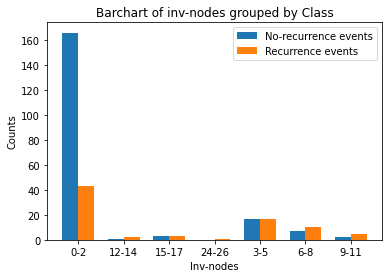

In [11]:
grp = df.groupby(['inv-nodes', 'Class'])['inv-nodes'].count().unstack().reset_index()
labels = list(grp.iloc[:, 0].values)
no_dis = list(grp.iloc[:, 1].values) 
yes_dis = list(grp.iloc[:, 2].values)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_dis, width, label='No-recurrence events')
rects2 = ax.bar(x + width/2, yes_dis, width, label='Recurrence events')

ax.set_ylabel('Counts')
ax.set_xlabel('Inv-nodes')
ax.set_title('Barchart of inv-nodes grouped by Class')
ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

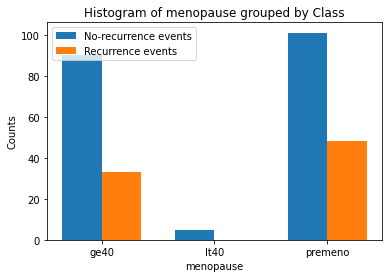

In [12]:
grp = df.groupby(['menopause', 'Class'])['menopause'].count().unstack().reset_index()
labels = list(grp.iloc[:, 0].values)
no_dis = list(grp.iloc[:, 1].values) 
yes_dis = list(grp.iloc[:, 2].values)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_dis, width, label='No-recurrence events')
rects2 = ax.bar(x + width/2, yes_dis, width, label='Recurrence events')

ax.set_ylabel('Counts')
ax.set_xlabel('menopause')
ax.set_title('Histogram of menopause grouped by Class')
ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

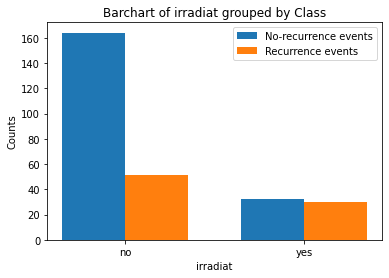

In [13]:
grp = df.groupby(['irradiat', 'Class'])['irradiat'].count().unstack().reset_index()
labels = list(grp.iloc[:, 0].values)
no_dis = list(grp.iloc[:, 1].values) 
yes_dis = list(grp.iloc[:, 2].values)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_dis, width, label='No-recurrence events')
rects2 = ax.bar(x + width/2, yes_dis, width, label='Recurrence events')

ax.set_ylabel('Counts')
ax.set_xlabel('irradiat')
ax.set_title('Barchart of irradiat grouped by Class')
ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

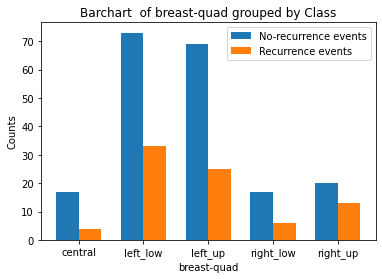

In [14]:
grp = df.groupby(['breast-quad', 'Class'])['breast-quad'].count().unstack().reset_index()
labels = list(grp.iloc[:, 0].values)
no_dis = list(grp.iloc[:, 1].values) 
yes_dis = list(grp.iloc[:, 2].values)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_dis, width, label='No-recurrence events')
rects2 = ax.bar(x + width/2, yes_dis, width, label='Recurrence events')

ax.set_ylabel('Counts')
ax.set_xlabel('breast-quad')
ax.set_title('Barchart  of breast-quad grouped by Class')
ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

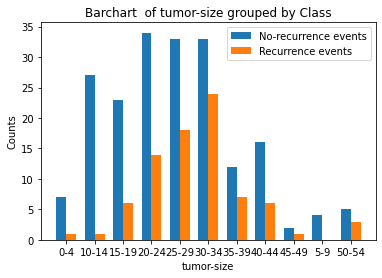

In [15]:
grp = df.groupby(['tumor-size', 'Class'])['tumor-size'].count().unstack().reset_index()
labels = list(grp.iloc[:, 0].values)
no_dis = list(grp.iloc[:, 1].values) 
yes_dis = list(grp.iloc[:, 2].values)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_dis, width, label='No-recurrence events')
rects2 = ax.bar(x + width/2, yes_dis, width, label='Recurrence events')

ax.set_ylabel('Counts')
ax.set_xlabel('tumor-size')
ax.set_title('Barchart  of tumor-size grouped by Class')
ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

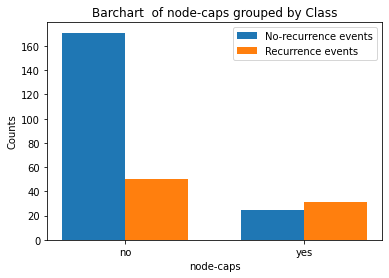

In [16]:
grp = df.groupby(['node-caps', 'Class'])['node-caps'].count().unstack().reset_index()
labels = list(grp.iloc[:, 0].values)
no_dis = list(grp.iloc[:, 1].values) 
yes_dis = list(grp.iloc[:, 2].values)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_dis, width, label='No-recurrence events')
rects2 = ax.bar(x + width/2, yes_dis, width, label='Recurrence events')

ax.set_ylabel('Counts')
ax.set_xlabel('node-caps')
ax.set_title('Barchart  of node-caps grouped by Class')
ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

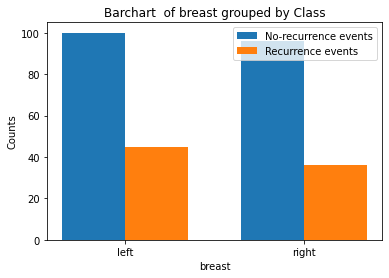

In [17]:
grp = df.groupby(['breast', 'Class'])['breast'].count().unstack().reset_index()
labels = list(grp.iloc[:, 0].values)
no_dis = list(grp.iloc[:, 1].values) 
yes_dis = list(grp.iloc[:, 2].values)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_dis, width, label='No-recurrence events')
rects2 = ax.bar(x + width/2, yes_dis, width, label='Recurrence events')

ax.set_ylabel('Counts')
ax.set_xlabel('breast')
ax.set_title('Barchart  of breast grouped by Class')
ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

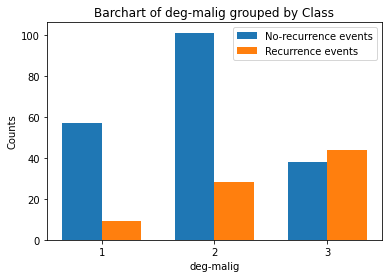

In [18]:
grp = df.groupby(['deg-malig', 'Class'])['deg-malig'].count().unstack().reset_index()
labels = list(grp.iloc[:, 0].values)
no_dis = list(grp.iloc[:, 1].values) 
yes_dis = list(grp.iloc[:, 2].values)
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_dis, width, label='No-recurrence events')
rects2 = ax.bar(x + width/2, yes_dis, width, label='Recurrence events')

ax.set_ylabel('Counts')
ax.set_xlabel('deg-malig')
ax.set_title('Barchart of deg-malig grouped by Class')
ax.set_xticks(x) # values
ax.set_xticklabels(labels) # labels
ax.legend()

## Label encoding


In [19]:
from sklearn import preprocessing
dfx =df.apply(preprocessing.LabelEncoder().fit_transform)
dfx.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,0,2,0,1,0
1,0,2,2,3,0,0,1,1,4,0
2,0,2,2,3,0,0,1,0,1,0
3,0,4,0,2,0,0,1,1,2,0
4,0,2,2,0,0,0,1,1,3,0


## Coorelation 


In [20]:
dfx.corr()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
Class,1.000000,-0.086981,0.059512,0.143968,0.325523,0.289002,0.330253,-0.041304,0.059788,0.226020
age,-0.086981,1.000000,-0.717573,-0.008578,-0.089014,-0.044446,-0.065260,-0.041744,-0.036234,-0.075946
menopause,0.059512,-0.717573,1.000000,-0.003001,0.020757,0.025001,-0.047721,0.055761,0.075289,0.071825
tumor-size,0.143968,-0.008578,-0.003001,1.000000,0.157523,0.166014,0.152436,0.029738,0.154654,0.166291
inv-nodes,0.325523,-0.089014,0.020757,0.157523,1.000000,0.672745,0.306197,0.031232,0.033165,0.342650
node-caps,0.289002,-0.044446,0.025001,0.166014,0.672745,1.000000,0.330181,-0.012345,0.065050,0.333537
deg-malig,0.330253,-0.065260,-0.047721,0.152436,0.306197,0.330181,1.000000,-0.045874,0.038025,0.230821
breast,-0.041304,-0.041744,0.055761,0.029738,0.031232,-0.012345,-0.045874,1.000000,0.211900,0.025230
breast-quad,0.059788,-0.036234,0.075289,0.154654,0.033165,0.065050,0.038025,0.211900,1.000000,0.017440
irradiat,0.226020,-0.075946,0.071825,0.166291,0.342650,0.333537,0.230821,0.025230,0.017440,1.000000


## Plotting correlation heatmap

<AxesSubplot:>

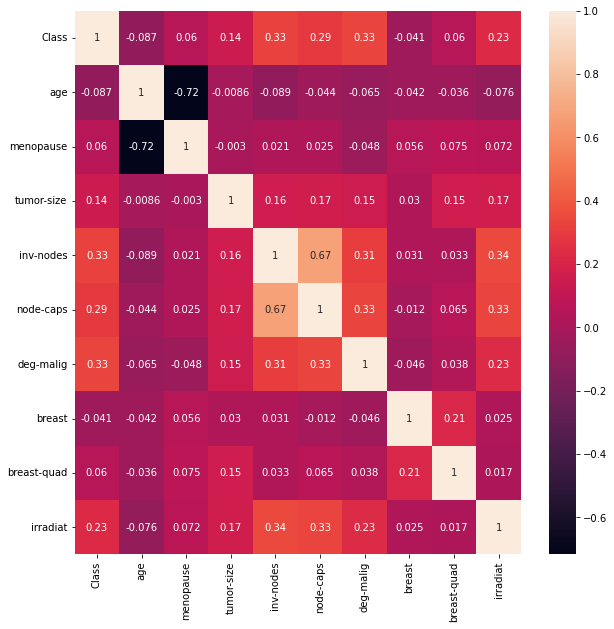

In [21]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(dfx.corr(),annot=True)

## Scaling

In [22]:
x=dfx.loc[:, dfx.columns != 'Class']
y = dfx['Class'].values

In [23]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8
0,-1.629078,0.918558,0.428346,-0.54156,-0.503382,1.293094,-0.954120,-0.718397,-0.537003
1,-0.637310,0.918558,-0.491435,-0.54156,-0.503382,-0.079270,1.048086,2.020079,-0.537003
2,-0.637310,0.918558,-0.491435,-0.54156,-0.503382,-0.079270,-0.954120,-0.718397,-0.537003
3,1.346227,-1.108857,-0.951326,-0.54156,-0.503382,-0.079270,1.048086,0.194428,-0.537003
4,-0.637310,0.918558,-1.871107,-0.54156,-0.503382,-0.079270,1.048086,1.107254,-0.537003


In [24]:
df.shape

(277, 10)

## Train Test Validation Split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1, random_state = 150)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.1, random_state = 150)


In [26]:

print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("x val: ",x_val.shape)

print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
print("y val: ",y_val.shape)

x train:  (224, 9)
x test:  (28, 9)
x val:  (25, 9)
y train:  (224,)
y test:  (28,)
y val:  (25,)


In [27]:
# Defining logistic regression
recurrence_classifier = LogisticRegression(C=0.001)

In [28]:
recurrence_classifier.fit(x_train, y_train)
y_pred = recurrence_classifier.predict(x_test)
y_pred_val = recurrence_classifier.predict(x_val)

In [29]:
# Model Evaluation (Logistic regression)
print(classification_report(y_test, y_pred))

print("Test Accuracy: ", accuracy_score(y_test, y_pred))
print("Val Accuracy: ", accuracy_score(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        21
           1       0.00      0.00      0.00         7

    accuracy                           0.75        28
   macro avg       0.38      0.50      0.43        28
weighted avg       0.56      0.75      0.64        28

Test Accuracy:  0.75
Val Accuracy:  0.6


## Plotting ROC curve and AUC

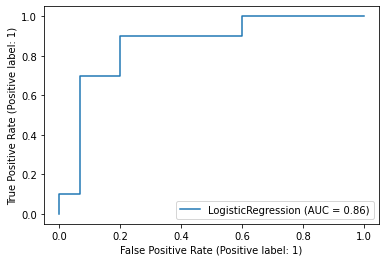

In [30]:
metrics.plot_roc_curve(recurrence_classifier, x_val, y_val)

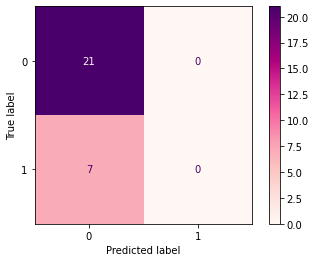

In [31]:
confusion_matrix = metrics.plot_confusion_matrix(recurrence_classifier, x_test, y_test, cmap='RdPu')
print(confusion_matrix)

## Tuning Lambda

['10000.0', '1000.0', '100.0', '10.0', '1.0', '0.1', '0.01', '0.001']


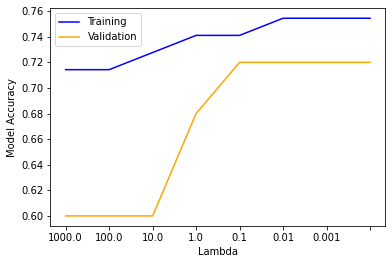

In [32]:
C_values = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
# C_values= np.linspace(0.01,10,100)
lambda_ = [str(1/i) for i in C_values]
print(lambda_)
train_acc, val_acc, test_acc = [], [], []

for c in C_values:
    # where lambda = 1/c
    r_c = LogisticRegression(C = c, random_state = 1)
    r_c.fit(x_train,y_train)
    
    
    y_pred_train = r_c.predict(x_train)
    y_pred_valid = r_c.predict(x_val)
    y_pred_test = r_c.predict(x_test)
    
    # accuracy
    train_acc.append(accuracy_score(y_train, y_pred_train))
    val_acc.append(accuracy_score(y_val, y_pred_valid))
    test_acc.append(accuracy_score(y_test, y_pred_test))


fig, ax = plt.subplots()
fig.canvas.draw()
plt.xlabel("Lambda")
plt.ylabel("Model Accuracy")
plt.plot(np.array(train_acc), color='blue', label='Training')
plt.plot(np.array(val_acc), color='orange', label='Validation')


plt.legend()
ax.set_xticklabels(lambda_) 
plt.show()

## K-fold cross-validaiton for hypterparameter selection

In [33]:

grid_select={"C":[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]}

search_cv = GridSearchCV(recurrence_classifier, param_grid=grid_select, cv=7, scoring='accuracy', verbose=True, n_jobs=-1)

best_clf = search_cv.fit(x_val, y_val
                         )



Fitting 7 folds for each of 8 candidates, totalling 56 fits


In [34]:
# Best hyperparameter
print("Best hpyerparameters :(best parameters) ",best_clf.best_params_)
print("accuracy :", best_clf.best_score_)

Best hpyerparameters :(best parameters)  {'C': 0.1}
accuracy : 0.7261904761904763


# Classification using SVM

In [35]:
from sklearn.svm import SVC
from sklearn import svm

In [36]:
svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)
pred_clf = svm_clf.predict(x_test)
pred_clf_val = svm_clf.predict(x_val)

In [37]:
# Prediction
print(classification_report(y_test, pred_clf))


              precision    recall  f1-score   support

           0       0.84      1.00      0.91        21
           1       1.00      0.43      0.60         7

    accuracy                           0.86        28
   macro avg       0.92      0.71      0.76        28
weighted avg       0.88      0.86      0.83        28



In [38]:
print('test_acc ',accuracy_score(y_test, pred_clf))
print('val acc', accuracy_score(y_val, pred_clf_val))

test_acc  0.8571428571428571
val acc 0.76


# Learning Curve

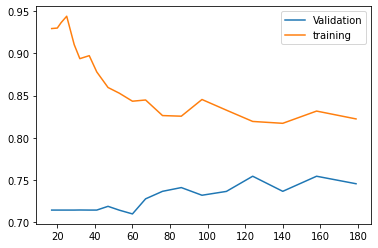

In [39]:
train_sizes, train_scores, validation_scores = learning_curve(svm_clf, x_train, y_train, train_sizes=np.logspace(-1, 0, 20))

plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation') 
plt.plot(train_sizes, train_scores.mean(axis=1), label='training') 
plt.legend()
plt.show()

In [58]:
#Here from above we can see that the score of training is
#higher than the validation which signifies there is a overfitting. 
#Overfitting is a concept in data science, which occurs when a statistical
#model fits exactly against its training data

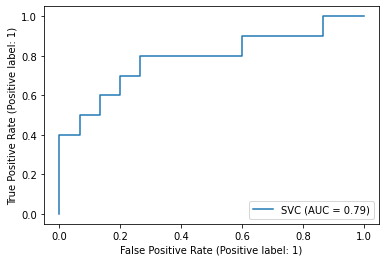

In [40]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm_clf, x_val, y_val)

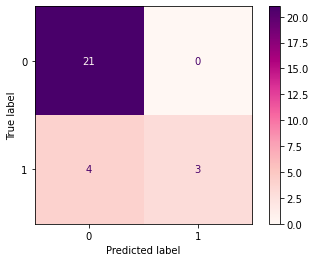

In [41]:
confusion_matrix = metrics.plot_confusion_matrix(svm_clf, x_test, y_test, cmap='RdPu')
print(confusion_matrix)

Tuning Hyperparameters

['100.0', '2.0', '10.0', '1.0', '0.1', '0.0625', '0.04']


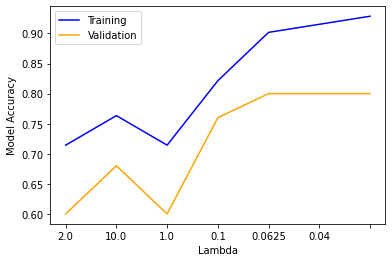

In [42]:
C_values = [ 0.01,0.5,0.1, 1, 10, 16,25]
# C_values= np.linspace(0.01,10,100)
lambda_ = [str(1/i) for i in C_values]
print(lambda_)
train_acc, val_acc, test_acc = [], [], []

for c in C_values:
    # where lambda = 1/c
    sclf = svm.SVC(C = c, random_state = 1)
    sclf.fit(x_train,y_train)
    
    
    y_pred_train = sclf.predict(x_train)
    y_pred_valid = sclf.predict(x_val)
    y_pred_test = sclf.predict(x_test)
    
    # accuracy
    train_acc.append(accuracy_score(y_train, y_pred_train))
    val_acc.append(accuracy_score(y_val, y_pred_valid))
    test_acc.append(accuracy_score(y_test, y_pred_test))


fig, ax = plt.subplots()
fig.canvas.draw()
plt.xlabel("Lambda")
plt.ylabel("Model Accuracy")
plt.plot(np.array(train_acc), color='blue', label='Training')
plt.plot(np.array(val_acc), color='orange', label='Validation')


plt.legend()
ax.set_xticklabels(lambda_) #
plt.show()

In [43]:
grid_select={"C":[ 0.01,0.5,0.1, 1, 10, 16,25], 'degree':[3, 4, 5, 6]}
svm_clf = svm.SVC()
svm_cv = GridSearchCV(svm_clf, param_grid=grid_select, cv=5, scoring='accuracy', verbose=True, n_jobs=-1)

fine_classifier = svm_cv.fit(x_val, y_val)



Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [44]:
# Best hyperparameter
print("Best hpyerparameters :(best parameters) ",fine_classifier.best_params_)
print("accuracy :",fine_classifier.best_score_)

Best hpyerparameters :(best parameters)  {'C': 1, 'degree': 3}
accuracy : 0.64


In [45]:
### The best params form grid search for svc from grid search shows different result
accuracy_score(fine_classifier.predict(x_val),y_val)

0.96

# Neural Network


In [46]:
multilayer_classifier = MLPClassifier(hidden_layer_sizes=(10, 30, 10), max_iter=1000)
multilayer_classifier.fit(x_train, y_train)
pred_multilayer_classifier = multilayer_classifier.predict(x_test)

In [47]:
print(classification_report(y_test, pred_multilayer_classifier))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.75      0.86      0.80         7

    accuracy                           0.89        28
   macro avg       0.85      0.88      0.86        28
weighted avg       0.90      0.89      0.90        28



In [48]:
print('Validation acc',accuracy_score(y_val, multilayer_classifier.predict(x_val)))
print('test acc',accuracy_score(y_test, pred_multilayer_classifier))

Validation acc 0.68
test acc 0.8928571428571429


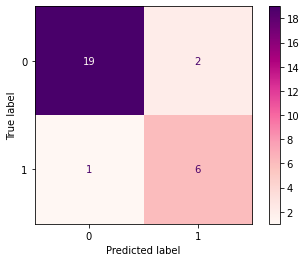

In [49]:
confusion_matrix = metrics.plot_confusion_matrix(multilayer_classifier, x_test, y_test, cmap='RdPu')
print(confusion_matrix)

# Roc curve


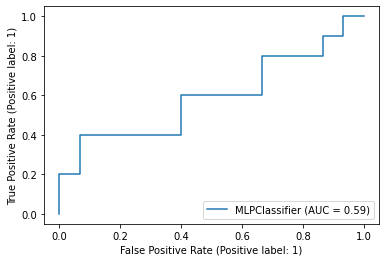

In [50]:
metrics.plot_roc_curve(multilayer_classifier, x_val, y_val)

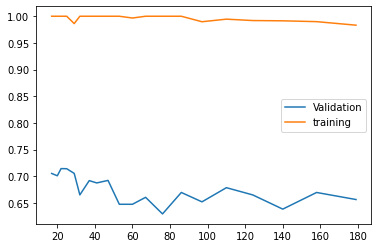

In [51]:
train_sizes, train_scores, validation_scores = learning_curve(multilayer_classifier, x_train, y_train, train_sizes=np.logspace(-1, 0, 20))

plt.plot(train_sizes, validation_scores.mean(axis=1), label='Validation') 
plt.plot(train_sizes, train_scores.mean(axis=1), label='training') 
plt.legend()
plt.show()

In [52]:
parameters_ = {
    'hidden_layer_sizes': [(10,30,10),(10,20,10),(20,15,10)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}
#grid search in validation data
classifier_ = GridSearchCV(multilayer_classifier, parameters_, n_jobs=-1, cv=5, verbose=True)
best = classifier_.fit(x_val, y_val) 


Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [53]:
print('Best Parameters:\n', classifier_.best_params_)
print("accuracy :", best.best_score_)

Best Parameters:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (10, 20, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
accuracy : 0.72


## ROC Curve comparision

In [54]:
svm_clf = svm.SVC(C=10,degree=1)
lr = LogisticRegression(C=0.1)

mlp = MLPClassifier(hidden_layer_sizes=(10, 20, 10),activation='relu',alpha=0.05,learning_rate='adaptive',solver='sgd', max_iter=1000)
lr.fit(x_train, y_train)
svm_clf.fit(x_train, y_train)
mlp.fit(x_train, y_train)

MLPClassifier(alpha=0.05, hidden_layer_sizes=(10, 20, 10),
              learning_rate='adaptive', max_iter=1000, solver='sgd')

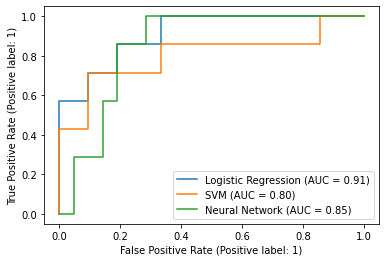

In [55]:
disp= plot_roc_curve(lr, x_test,y_test, name="Logistic Regression")
plot_roc_curve(svm_clf,x_test,y_test, ax= disp.ax_, name="SVM");
plot_roc_curve(mlp,x_test,y_test, ax= disp.ax_,name="Neural Network");
